#### Block 1:  Import general purpose packages for ease of use and improved performance.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import inspect
import pprint

#### Block 2:  Import packages for a typical deep learning workflow using TensorFlow and Keras.  Import the California housing market dataset from Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import california_housing

Understand the `california_housing` package:

In [ ]:
## Get to know the california_housing dataset
dir(california_housing)

## Methods that are shared by two datasets
## -> load_data method.

## What method or methods are found in only one of the datasets?
## -> get_word_index method is only in the imdb dataset.

## Are the similarities and differences between the two sets of methods
## consistent with the similarities and differences between the datasets? Why or
## why not?
## -> Both datasets need the load_data method to get the dataset from the
##    library. However, since the data structures in two datasets are different,
##    california_housing dataset doesn't get_word_index like imdb dataset. The
##    california_housing dataset provides information about median house prices
##    rather than getting frequent words from movie reviews.
##
##    A second point is that despite two datasets have same load_data method,
##    the number of parameters in each load_data method are different between
##    these two datasets.
##
##    The third point is that the load_data method in two datasets both return a
##    tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [ ]:
help(california_housing.load_data)

Help on function load_data in module keras.src.datasets.california_housing:

load_data(version='large', path='california_housing.npz', test_split=0.2, seed=113)
    Loads the California Housing dataset.
    
    This dataset was obtained from the [StatLib repository](
    https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html).
    
    It's a continuous regression dataset with 20,640 samples with
    8 features each.
    
    The target variable is a scalar: the median house value
    for California districts, in dollars.
    
    The 8 input features are the following:
    
    - MedInc: median income in block group
    - HouseAge: median house age in block group
    - AveRooms: average number of rooms per household
    - AveBedrms: average number of bedrooms per household
    - Population: block group population
    - AveOccup: average number of household members
    - Latitude: block group latitude
    - Longitude: block group longitude
    
    This dataset was derived from 

####  Block 3:  Define functions called in subsequent blocks.

In [ ]:
def build_model():
    # Define the structure of the model.
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error'],
    ),
    return model

#### Block 4:  Load the small version of the California housing dataset.

In [ ]:
(train_data, train_targets), (test_data, test_targets) = california_housing.load_data(version='small')

#### Block 5:  Prepare (normalize) the data and the targets.

In [ ]:
## Print a statement that can be used to confirm that a sample in the dataset is
## described by eight features
print('Number of features in the dataset is:',
      train_data.shape[1])

## Calculate and report the default value of test_split, expressed as a floating
## point number with one decimal place.
## -> Default test_split value is 0.2 based on the documentation
default_test_split = inspect.signature(california_housing.load_data)\
  .parameters['test_split'].default
print('Default value of test_split is:', default_test_split)
print('Default value of test_split is:', default_test_split)

calculated_test_split = len(test_data) / (len(train_data) + len(test_data))
print('Calculated value of test_split is:', calculated_test_split)

if (default_test_split == calculated_test_split):
  print('The default value and calculated values of test_split are equal.')
else:
  print('The default value and calculated values of test_split are not equal.')

Number of features in the dataset is: 8
Default value of test_split is: 0.2
Default value of test_split is: 0.2
Calculated value of test_split is: 0.2
The default value and calculated values of test_split are equal.


In [ ]:
## Explore train_data and train_targets using NumPy functions like min, max,
## mean, median, and stdev
print('Minimum value of train_data is:', np.min(train_data))
print('Maximum value of train_data is:', np.max(train_data))
print('Mean value of train_data is:', np.mean(train_data))
print('Median value of train_data is:', np.median(train_data))
print('Standard deviation of train_data is:', np.std(train_data))
print('---')
print('Minimum value of train_targets is:', np.min(train_targets))
print('Maximum value of train_targets is:', np.max(train_targets))
print('Mean value of train_targets is:', np.mean(train_targets))
print('Median value of train_targets is:', np.median(train_targets))
print('Standard deviation of train_targets is:', np.std(train_targets))

Minimum value of train_data is: -122.33
Maximum value of train_data is: 18634.0
Mean value of train_data is: 469.2287
Median value of train_data is: 52.0
Standard deviation of train_data is: 887.2695
---
Minimum value of train_targets is: 60000.0
Maximum value of train_targets is: 500001.0
Mean value of train_targets is: 204178.56
Median value of train_targets is: 182650.0
Standard deviation of train_targets is: 101582.8


In [ ]:
# Normalize the training and testing data (make the training data have
# a mean of 0 and a standard deviation of 1).
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
x_train = (train_data - mean)/std
x_test = (test_data - mean)/std

# Normalize the training and testing targets (divide all by a scale
# factor so that they are about 1).
model_sf = 100000
y_train = train_targets/model_sf
y_test = test_targets/model_sf

In [ ]:
## Write a code snippet that confirms that the features of the input data have
## been normalized using np.mean and np.std
print('-> Check mean and std of train_data and test_data:')
print('train_data mean:', np.mean(train_data))
print('train_data std deviation:', np.std(train_data))
print('test_data mean:', np.mean(test_data))
print('test_data std deviation:', np.std(test_data))

print('\n-> Check mean and std of x_train and x_test:')
print('x_train mean:', np.mean(x_train))
print('x_train std deviation:', np.std(x_train))
print('x_test mean:', np.mean(x_test))
print('x_test std deviation:', np.std(x_test))

print('\nConclusion: The x_train and x_test data have been normalized.')

print('-> Check mean and std of train_targets and test_targets:')
print('train_targets mean:', np.mean(train_targets))
print('train_targets std deviation:', np.std(train_targets))
print('test_targets mean:', np.mean(test_targets))
print('test_targets std deviation:', np.std(test_targets))

print('\n-> Check mean and std of y_train and y_test:')
print('y_train mean:', np.mean(y_train))
print('y_train std deviation:', np.std(y_train))
print('y_test mean:', np.mean(y_test))
print('y_test std deviation:', np.std(y_test))

print('\nConclusion: The y_train and y_test data have been normalized.')

## Based on the discussion of data leakage, do you expect the testing dataset to
## be normalized? Is the testing dataset normalized? Write a comment that
## explains your expectation and what you did to confirm or refute it.
## -> I can see from the code and the printed results that x_train and x_test
##    were both normalized using the mean and standard deviation from the
##    training data. The normalized values are smaller than the original data.
##    Similarly, for y_train and y_test, the values were scaled down by dividing
##    by the scale factor of 100000.

-> Check mean and std of train_data and test_data:
train_data mean: 469.2287
train_data std deviation: 887.2695
test_data mean: 494.53387
test_data std deviation: 921.9496

-> Check mean and std of x_train and x_test:
x_train mean: 7.188742e-05
x_train std deviation: 0.9999996
x_test mean: -0.0025220534
x_test std deviation: 1.0173503

Conclusion: The x_train and x_test data have been normalized.
-> Check mean and std of train_targets and test_targets:
train_targets mean: 204178.56
train_targets std deviation: 101582.8
test_targets mean: 196155.02
test_targets std deviation: 101522.86

-> Check mean and std of y_train and y_test:
y_train mean: 2.0417855
y_train std deviation: 1.015828
y_test mean: 1.9615501
y_test std deviation: 1.0152285

Conclusion: The y_train and y_test data have been normalized.


#### Block 6A:  Build and train the model.  Assess the model using K-fold validation.

In [ ]:
K = 4
n_partitions = len(x_train)//K
n_epochs = 50
all_MAE = []
for i in range(K):
    print(f'Processing fold #{i+1}')
    fold_x_val = x_train[i*n_partitions:(i + 1)*n_partitions]
    fold_y_val = y_train[i*n_partitions:(i + 1)*n_partitions]
    fold_x_train = np.concatenate([x_train[:i*n_partitions],
                                   x_train[(i + 1)*n_partitions:]],
                                   axis=0)
    fold_y_train = np.concatenate([y_train[:i*n_partitions],
                                   y_train[(i + 1)*n_partitions:]],
                                   axis=0)
    model = build_model()
    model.fit(fold_x_train, fold_y_train,
              epochs=n_epochs, batch_size=16, verbose=0)
    scores = model.evaluate(fold_x_val, fold_y_val, verbose=0)
    all_MAE.append(scores[1])

Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4


#### Block 6B:  Assess the output of the K-fold validation.

In [ ]:
print(all_MAE)
mean_MAE = np.mean(all_MAE)
stdev_MAE = np.std(all_MAE, ddof=1)
# Calculate the relative standard deviation of the mean absolute error as
# a percentage.
RSD_MAE = 100*stdev_MAE/mean_MAE
print(mean_MAE)
print(stdev_MAE)
print(RSD_MAE)
## Add a comment interpreting the RSD of the MAE here.
## -> Ref: https://www.statisticshowto.com/relative-standard-deviation/
##    "The RSD tells you whether the “regular” std dev is a small or large
##     quantity when compared to the mean for the data set."
##    From the results, we can see that the standard deviation (stdev_MAE) is
##    ~0.028, which shows that the performance is quite consistent across the 4
##    folds. Therefore, this leads to a small RSD (~9.57), which tells us that
##    the model is stable and generalizes well across different subsets of the
##    data.

[0.2910185754299164, 0.29920297861099243, 0.2509784400463104, 0.3163749575614929]
0.28939373791217804
0.027704287417499328
9.573215929747144


#### Block 7:  Build and the model and assess it using K-fold validation, slight return.

In [ ]:
K = 4
n_partitions = len(x_train)//K
n_epochs = 200
all_MAE_histories = []
for i in range(K):
    print(f'Processing fold #{i+1}')
    fold_x_val = x_train[i*n_partitions:(i + 1)*n_partitions]
    fold_y_val = y_train[i*n_partitions:(i + 1)*n_partitions]
    fold_x_train = np.concatenate([x_train[:i*n_partitions],
                                   x_train[(i + 1)*n_partitions:]],
                                   axis=0)
    fold_y_train = np.concatenate([y_train[:i*n_partitions],
                                   y_train[(i + 1)*n_partitions:]],
                                   axis=0)
    model = build_model()
    history = model.fit(fold_x_train, fold_y_train,
                        validation_data=(fold_x_val, fold_y_val),
                        epochs=n_epochs, batch_size=16, verbose=0)
    MAE_history = history.history['val_mean_absolute_error']
    all_MAE_histories.append(MAE_history)


Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4


#### Block 8:  Summarize the training history.

In [ ]:
mean_MAE_history = {}

mean_MAE_history['nested_for'] = []
for i in range(n_epochs):
    MAE_total = []
    for MAE_history in all_MAE_histories:
        MAE_total.append(MAE_history[i])
    mean_MAE_history['nested_for'].append(sum(MAE_total)/4)

mean_MAE_history['nested_comprehension']          \
    = [np.mean([x[i] for x in all_MAE_histories]) \
       for i in range(n_epochs)]

mean_MAE_history['NumPy'] = np.mean(np.array(all_MAE_histories), axis=0)

#### Block 9:  Visualize the training history.

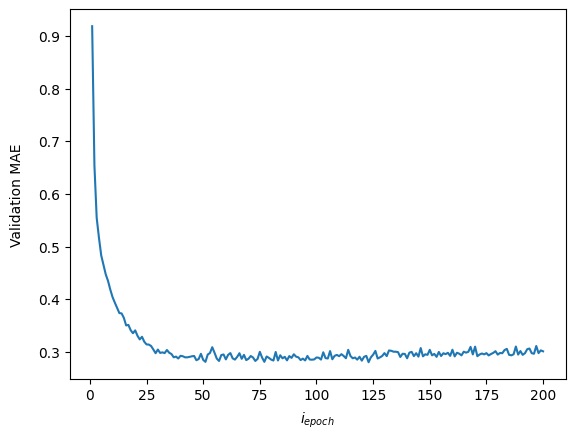

In [ ]:
# Set the index of the first epoch for which MAE will be plotted.
ifirst = 0
# Plot MAE vs epoch number.
fig, ax = plt.subplots()
ax.plot(range(1+ifirst, n_epochs+1), mean_MAE_history['NumPy'][ifirst:])
ax.set_xlabel(r'$i_{epoch}$', labelpad=5)
ax.set_ylabel('Validation MAE', labelpad=10)
fig.show()

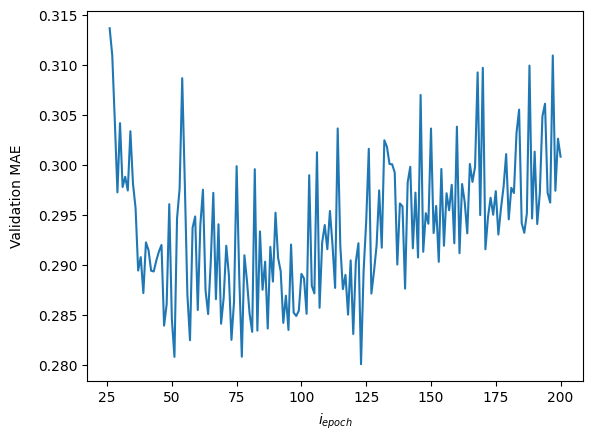

In [ ]:
## Vary ifirst, rerunning the code cell after each change, until you can make a
## reasonable estimate
## -> From the graph above, I believe ifirst between 20 and 25 would help me
##    make a reasonable estimate of the location of the minimum on the curve. So
##    let try again with ifirst = 25.

## -> Plot the graph again with ifirst = 25

ifirst = 25
# Plot MAE vs epoch number.
fig, ax = plt.subplots()
ax.plot(range(1+ifirst, n_epochs+1), mean_MAE_history['NumPy'][ifirst:])
ax.set_xlabel(r'$i_{epoch}$', labelpad=5)
ax.set_ylabel('Validation MAE', labelpad=10)
fig.show()

In [ ]:
## -> Now I can easily estimate the minimum validation MAE is at epoch 124th.

#### Block 10:  Retrain the model, from the ground up and evaluate it.

In [ ]:
# n_epochs = 130
## So instead going with n_epochs = 130, I will retrain the model with my
## estimated number of epochs, which is 124
n_epochs = 124
model = build_model()
model.fit(x_train, y_train,
          epochs=n_epochs, batch_size=16, verbose=0)
test_MSE, test_MAE = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3007 - mean_absolute_error: 0.3307  


#### Block 11:  Make predictions using the retrained model.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


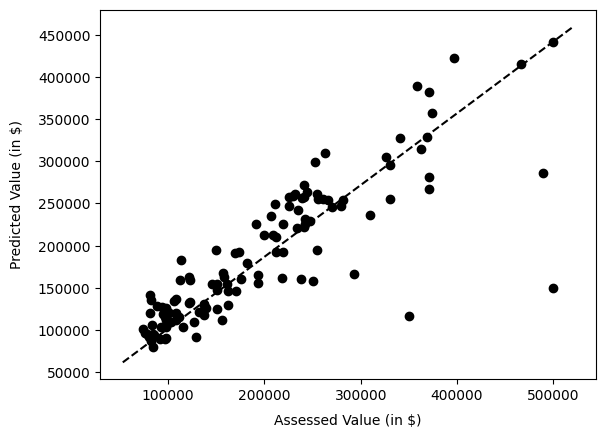

In [ ]:
# Predict house values using the features of the testing dataset.
plot_sf = model_sf
predicted_values = model.predict(x_test)
predicted_values = plot_sf*predicted_values
assessed_values = plot_sf*y_test
# Plot predicted house values vs assessed values.
fig, ax = plt.subplots()
ax.scatter(assessed_values, predicted_values, color=(0,0,0))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', color=(0,0,0))
ax.set_xlabel('Assessed Value (in $)', labelpad=8)
ax.set_ylabel('Predicted Value (in $)', labelpad=10)
fig.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


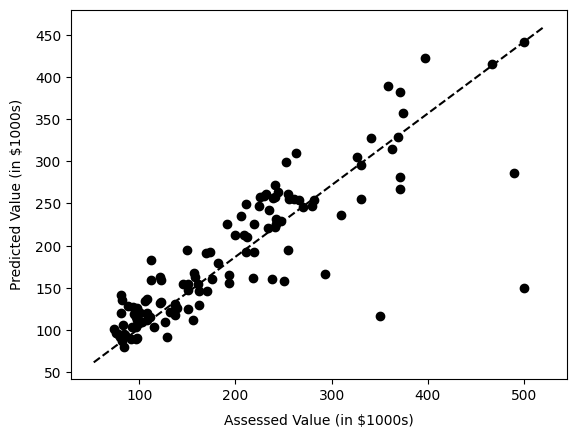

In [ ]:
## -> I aim to shortern the tick values in a new scale of thousands of dollars
##    (example: 100k would be shorter and easier to read). So to look back, we
##    originally divided by 100000 to normalize the data. Now I want to display
##    in thousands of dollars, so instead of multiplying by 100000 (full
##    recovery like the graph above), I multiply by 100 to convert it to
##    thousands of dollars.

##    The formula is quite simple:
##    new_scale_factor = original_scale_factor / expected_scale
##    so my new_scale_factor (100) = 100000 / 1000

##    I can display in millions of dollars by applying 100000 / 1000000 = 0.1,
##    which will be my new_scale_factor.


## Try again with new scale factor = 100 to display values in thousands of
## dollars and update the labels.
plot_sf = 100
predicted_values = model.predict(x_test)
predicted_values = plot_sf*predicted_values
assessed_values = plot_sf*y_test
# Plot predicted house values vs assessed values.
fig, ax = plt.subplots()
ax.scatter(assessed_values, predicted_values, color=(0,0,0))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', color=(0,0,0))
ax.set_xlabel('Assessed Value (in $1000s)', labelpad=8)
ax.set_ylabel('Predicted Value (in $1000s)', labelpad=8)
fig.show()

In [ ]:
## Now the numbers are cleaner to read.